# 图像分割质量测量
为了确定分割算法的好坏，并比较不同的算法，我们需要一个指标。一个常用的指标是[Jaccard指数](https://en.wikipedia.org/wiki/Jaccard_index)，它衡量了参考分割和算法产生的分割之间的重叠程度。如果我们使用标签图像，一个公平的方法是确定每个标注对象与自动分割中最重叠的对象的重叠程度。如果我们对所有标注对象取平均值，我们就得到了[The Segmentation Game中定义的稀疏Jaccard指数](https://github.com/haesleinhuepf/the-segmentation-game#segmentation-algorithm-comparison)。

In [10]:
import os
import napari
import napari_segment_blobs_and_things_with_membranes as nsbatwm
from the_segmentation_game import metrics
from skimage.io import imread

为了演示这一点，我们从[BBBC007](https://bbbc.broadinstitute.org/BBBC007)数据集中随机选择了一个示例图像（Jones等人，Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications，2005），该数据集可从Broad Bioimage Benchmark Collection获得[Ljosa等人，Nature Methods，2012]。

In [9]:
image_folder = "../../data/BBBC007_batch/"
sparse_annotation_folder = "../../data/BBBC007_sparse_instance_annotation/"

test_image_filename = "17P1_POS0013_D_1UL.tif"

为了可视化图像和相应的手动标注，我们使用napari。

In [3]:
viewer = napari.Viewer()

## 示例图像

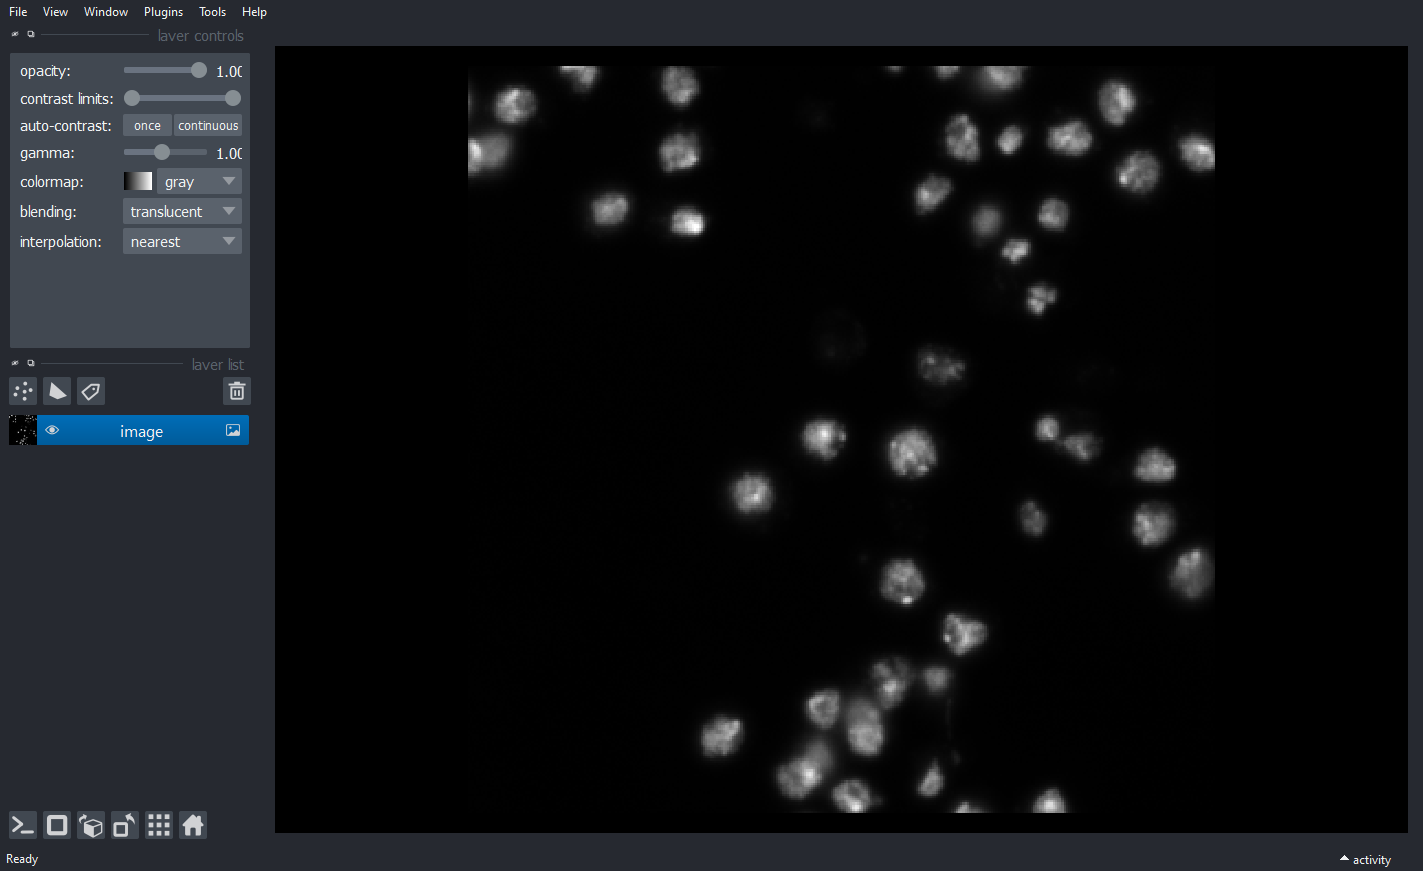

In [4]:
image = imread(folder + test_image_filename)

viewer.add_image(image)

napari.utils.nbscreenshot(viewer)

## 手动标注

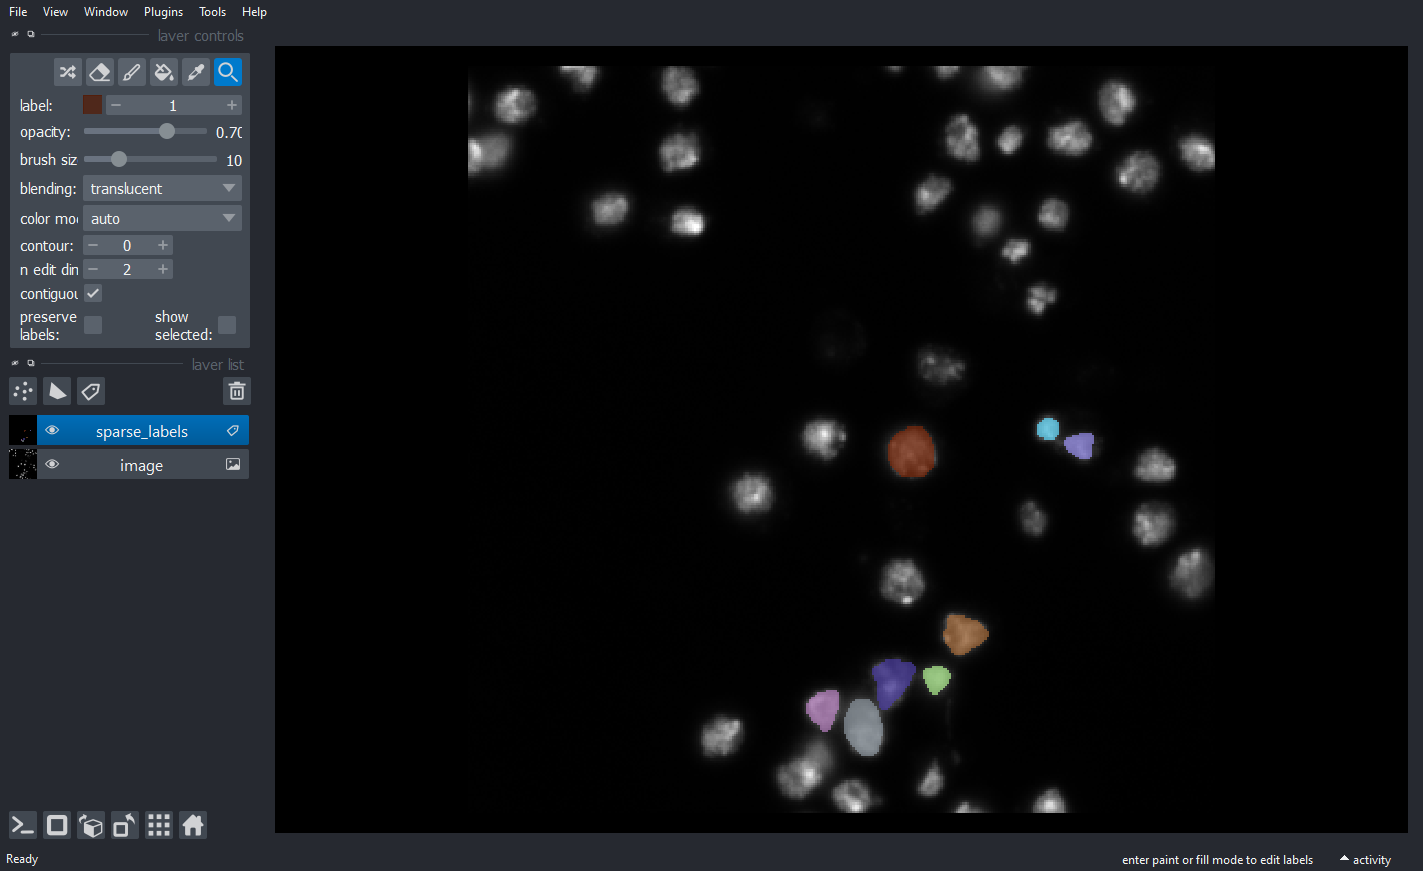

In [5]:
sparse_labels = imread(sparse_annotation_folder + test_image_filename)

viewer.add_labels(sparse_labels)

napari.utils.nbscreenshot(viewer)

In [6]:
# 隐藏最后一个标签层
viewer.layers[-1].visible = False

## 自动分割
出于演示目的，我们使用背景减除和Voronoi-Otsu标记来自动分割此图像中的细胞核。

In [15]:
def my_segmentation_algorithm(input_image):

    # 背景减除
    background_subtracted = nsbatwm.white_tophat(input_image, radius = 10)
    
    # 实例分割 / 标记
    labels_result = nsbatwm.voronoi_otsu_labeling(background_subtracted, spot_sigma=5, outline_sigma=1)

    return labels_result

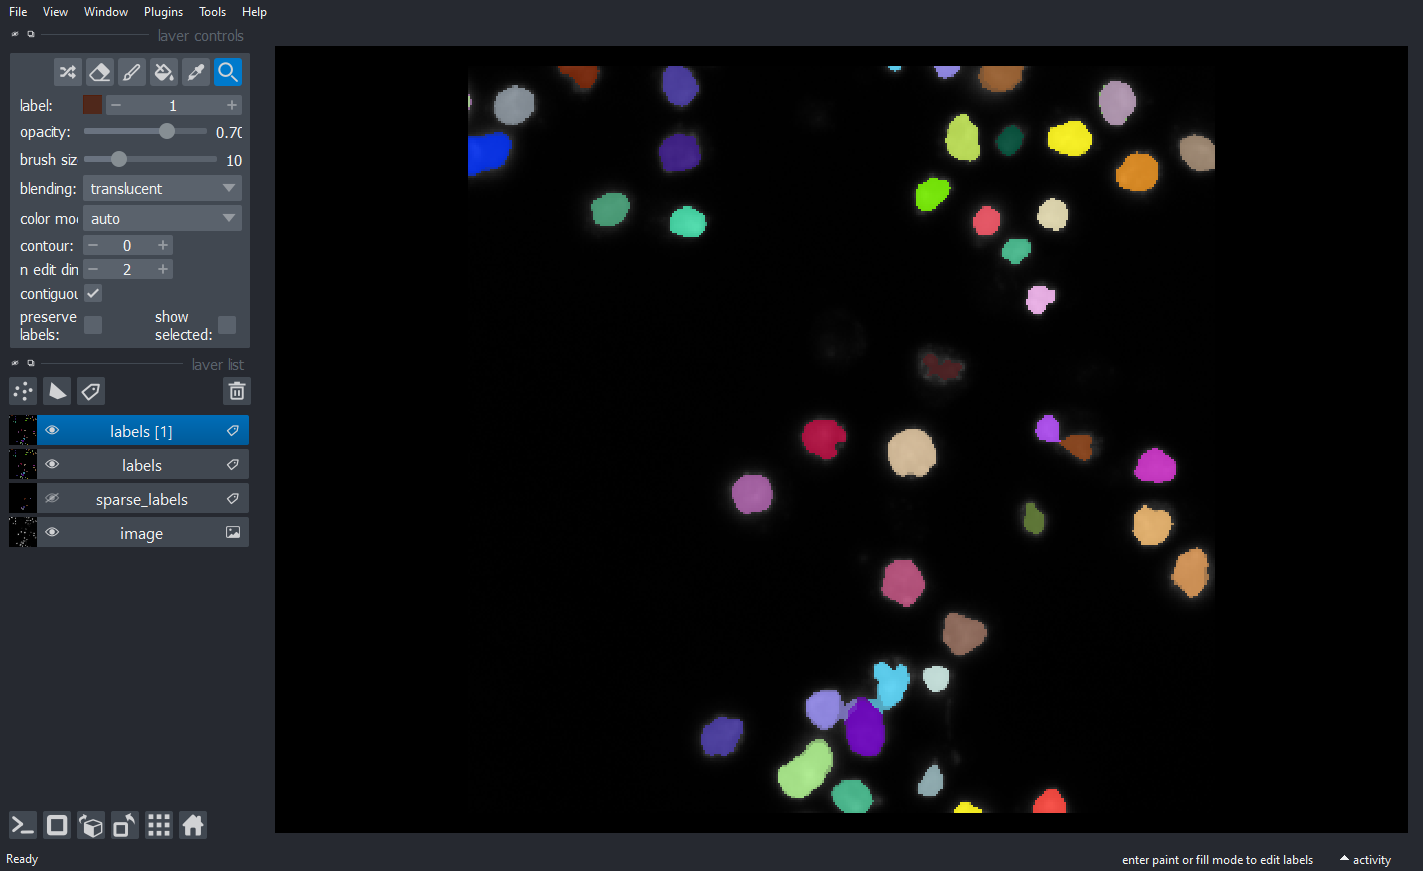

In [16]:
labels = my_segmentation_algorithm(image)

viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

## 质量估计：稀疏Jaccard指数
从上面加载和生成的两个标签图像中，我们可以计算稀疏Jaccard指数。

In [17]:
metrics.jaccard_index_sparse(sparse_labels, labels)

0.8357392602053431

## 练习
使用以下for循环和上面的代码片段来计算文件夹中所有图像的分割质量。提供所有图像的平均质量。

In [18]:
for image_filename in os.listdir(image_folder):
    print(image_folder + image_filename)

../../data/BBBC007_batch/17P1_POS0013_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0005_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0007_D_1UL.tif
../../data/BBBC007_batch/20P1_POS0010_D_1UL.tif
../../data/BBBC007_batch/A9 p7d.tif
../../data/BBBC007_batch/AS_09125_040701150004_A02f00d0.tif
